In [1]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10
T = 10

In [2]:
model_loop_b5_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b15 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 1])

metrics_l1_b5_b15_d10 = train_without_config(
    model_loop_b5_b15, cirriculum_b5_b15, model_n_dims=n_dims, 
    n_loop_window=T,
    log_every_steps=10, train_steps=15000, family="gpt2_loop", 
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  y = torch.nn.functional.scaled_dot_product_attention(


0


loss 3.077427387237549: 100%|██████████| 15000/15000 [33:26<00:00,  7.48it/s] 


In [3]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    n_loop_window=T,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


loss 10.646100997924805:   0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 4.806570529937744: 100%|██████████| 15000/15000 [19:41<00:00, 12.69it/s] 


In [4]:
model_loop_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

metrics_l1_b10_d10 = train_without_config(model_loop_b10, cirriculum_b10, model_n_dims=n_dims,
                                          n_loop_window=T,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


loss 9.895540237426758:   0%|          | 1/15000 [00:00<38:35,  6.48it/s]

0


loss 3.6663222312927246: 100%|██████████| 15000/15000 [40:56<00:00,  6.11it/s]


In [5]:
model_loop_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15 = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [5000, 15, 0])

metrics_l1_b15_d10 = train_without_config(model_loop_b15, cirriculum_b15, model_n_dims=n_dims,
                                          n_loop_window=T,
                                          log_every_steps=10, train_steps=15000, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


loss 11.011091232299805:   0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.728611946105957: 100%|██████████| 15000/15000 [44:49<00:00,  5.58it/s] 


In [6]:
model_loop_b5_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b10 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 1])

metrics_l1_b5_b10_d10 = train_without_config(
    model_loop_b5_b10, cirriculum_b5_b10, model_n_dims=n_dims,
    n_loop_window=T,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


loss 10.701240539550781:   0%|          | 1/15000 [00:00<25:51,  9.67it/s]

0


loss 3.779906749725342: 100%|██████████| 15000/15000 [33:05<00:00,  7.56it/s] 


In [7]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in range(1, 150):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=21, family="gpt2_loop", task_name="noisy_linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b10, values_b10 = calculate_by_loop(model_loop_b10)
steps_b5, values_b5 = calculate_by_loop(model_loop_b5)
steps_b5_b15, values_b5_b15 = calculate_by_loop(model_loop_b5_b15)
steps_b15, values_b15 = calculate_by_loop(model_loop_b15)
steps_b5_b10, values_b5_b10 = calculate_by_loop(model_loop_b5_b10)

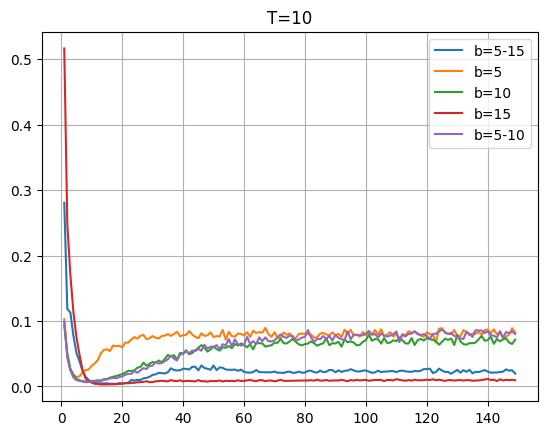

In [8]:
plt.plot(steps_b5_b15, values_b5_b15)
plt.plot(steps_b5, values_b5)
plt.plot(steps_b10, values_b10)
plt.plot(steps_b15, values_b15)
plt.plot(steps_b5_b10, values_b5_b10)
plt.grid()
plt.title("T=10")
plt.legend(["b=5-15", "b=5", "b=10", "b=15", "b=5-10"])
plt.savefig('../images/check_for_scheduling_convergence_properties_noisy_linear_regression_T_10.png')

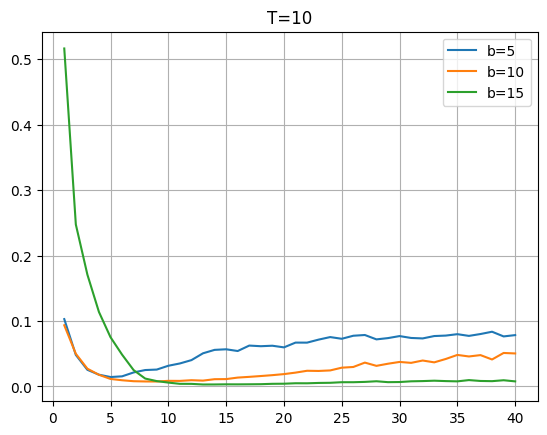

In [10]:
#plt.plot(steps_b5_b15[:40], values_b5_b15[:40])
plt.plot(steps_b5[:40], values_b5[:40])
plt.plot(steps_b10[:40], values_b10[:40])
plt.plot(steps_b15[:40], values_b15[:40])
#plt.plot(steps_b5_b10[:40], values_b5_b10[:40])
plt.grid()
plt.title("T=10")
#plt.legend(["b=5-15", "b=5", "b=10", "b=15", "b=5-10"])
plt.legend(["b=5", "b=10", "b=15"])
plt.savefig('../images/check_for_scheduling_convergence_properties_noisy_linear_regression_T_10_short.png')